In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('./datasets/russian-troll-tweets/combined.csv', dtype={'external_author_id': str, 'author':str, 'content':str, 'region': str, 'language': str, 'publish_date':str, 'harvested_date':str, 'following':int, 'followers':int, 'post_type':str, 'account_type':str, 'retweet':bool, 'account_category':str, 'new_june_2018':bool, 'alt_external_id':str, 'tweet_id': str, 'article_url': str, 'tco1_step1':str, 'tco2_step1':str, 'tco3_step1': str })

In [3]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%m/%d/%Y %H:%M')
df['publish_year'] = df['publish_date'].dt.year
df['publish_month'] = df['publish_date'].dt.month

df2 = df.groupby(by=['account_category', 'publish_year', 'publish_month']).count()
df2['posts_per_month'] = df2['publish_date']
df2.drop(columns = ['external_author_id', 'author', 'content', 'region', 'language', 'publish_date', 'harvested_date', 'following', 'followers', 'updates', 'post_type', 'account_type', 'retweet', 'new_june_2018', 'alt_external_id', 'tweet_id', 'article_url', 'tco1_step1', 'tco2_step1', 'tco3_step1'], inplace=True)
df2.reset_index(level=['publish_month','publish_year', 'account_category'], inplace=True)

df2['date'] = pd.to_datetime(pd.DataFrame({'year' : df2.publish_year.tolist(),'month' : df2.publish_month.tolist(), 'day' : 1}))

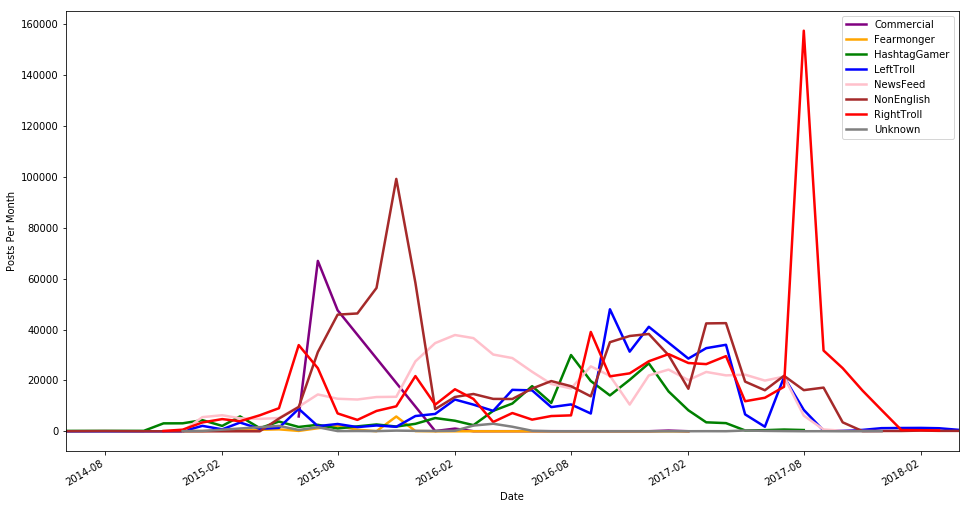

In [4]:
color_dict = {'Commercial':'purple', 'Fearmonger':'orange', 'HashtagGamer':'green', 'LeftTroll':'blue', 'NewsFeed':'pink', 'NonEnglish':'brown', 'RightTroll':'red', 'Unknown':'grey'}
fig, ax = plt.subplots(figsize=(16,9))

for key, grp in df2.groupby(['account_category']):
    c=color_dict[key]
    ax = grp.plot(ax=ax, kind='line', x='date', y='posts_per_month', linewidth=2.5, label=key, c=c)

ax.set_xlabel("Date")
ax.set_ylabel("Posts Per Month")
ax.set_xlim(pd.Timestamp('2014-06-01'), pd.Timestamp('2018-04-01'))
plt.legend(loc='best')
plt.show()

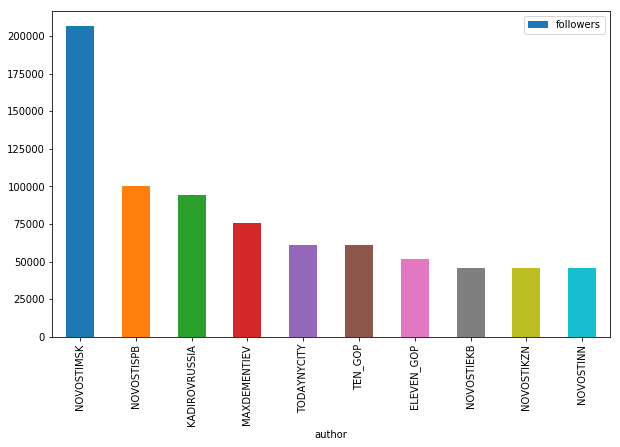

In [5]:
df.groupby(by='author').mean().sort_values(by='followers', ascending=False).head(10).plot(kind='bar', y='followers', figsize=(10,6))

In [6]:
author_data = pd.DataFrame()
author_data['tweet_count'] = df['author'].value_counts()
author_data = pd.concat([df.groupby(by='author').mean().sort_values(by='followers', ascending=False), author_data], axis=1, sort=False)
author_data.drop(['updates', 'retweet', 'new_june_2018', 'publish_year', 'publish_month'], axis=1, inplace=True)
author_data.index.name = 'author'
author_cat = df.groupby(by='author').account_category.apply(lambda x: x.mode())
author_cat.index = author_cat.index.droplevel(level=1)
author_data = pd.concat([author_cat, author_data], axis=1, sort=False)
author_type = df.groupby(by='author').account_type.apply(lambda x: x.mode())
author_type.index = author_type.index.droplevel(level=1)
author_data = pd.concat([author_type, author_data], axis=1, sort=False)
author_data.sort_values('followers', ascending=False).head(10)

,account_type,account_category,following,followers,tweet_count
author,,,,,
NOVOSTIMSK,Russian,NonEnglish,3908.956127,206644.979072,3966
NOVOSTISPB,Russian,NonEnglish,4669.052610,100328.480220,4904
KADIROVRUSSIA,Russian,NonEnglish,5.034096,94608.008281,4106
MAXDEMENTIEV,Russian,NonEnglish,8347.544778,75500.951701,4969
TODAYNYCITY,local,NewsFeed,9091.843118,61275.073630,18498
TEN_GOP,Right,RightTroll,46352.257737,61161.406808,11310
ELEVEN_GOP,Right,RightTroll,30094.930693,51567.722772,101
NOVOSTIEKB,Russian,NonEnglish,2436.779063,46078.343551,1729
NOVOSTIKZN,Russian,NonEnglish,4949.964094,45798.272819,2980


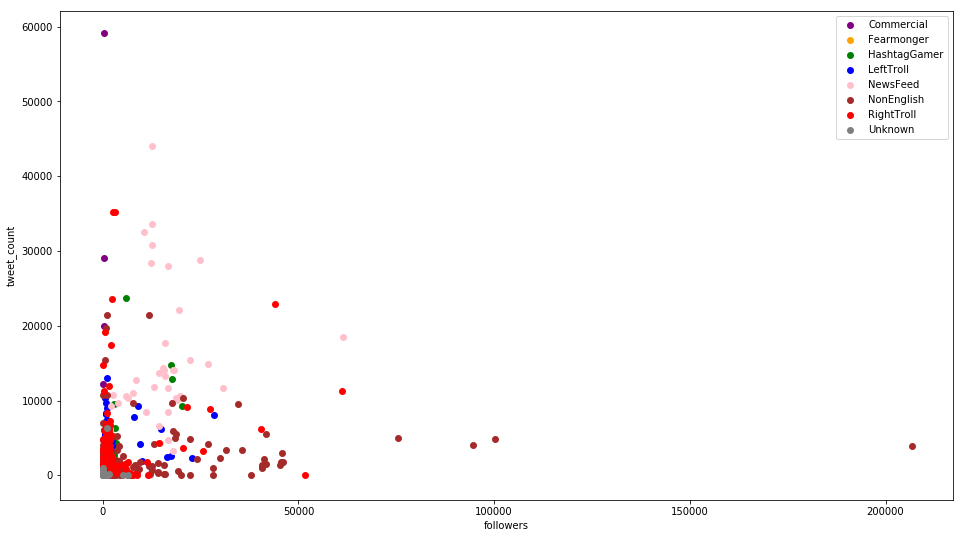

In [7]:
fig, ax = plt.subplots(figsize=(16,9))

color_dict = {'Commercial':'purple', 'Fearmonger':'orange', 'HashtagGamer':'green', 'LeftTroll':'blue', 'NewsFeed':'pink', 'NonEnglish':'brown', 'RightTroll':'red', 'Unknown':'grey'}

for key, grp in author_data.groupby(['account_category']):
    c=color_dict[key]
    ax = grp.plot(ax=ax, kind='scatter', x='followers', y='tweet_count', linewidth=2.5, label=key,c=c)

plt.legend(loc='best')
plt.show()

In [8]:
author_data.groupby('account_category').sum()

,following,followers,tweet_count
account_category,,,
Commercial,1867.699461,1.143060e+03,121904
Fearmonger,9784.827519,6.121264e+03,11140
HashtagGamer,183180.333290,1.859964e+05,241786
LeftTroll,276141.134801,2.486818e+05,427141
NewsFeed,302528.836684,6.295633e+05,598226
NonEnglish,957269.694379,2.303329e+06,820803
RightTroll,667207.893813,6.022074e+05,711668
Unknown,37802.185785,2.595784e+04,13539


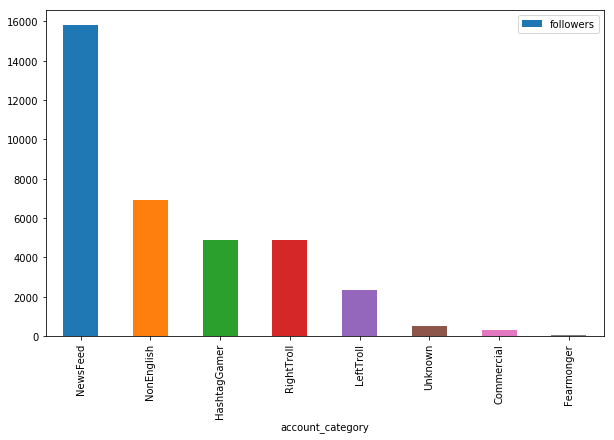

In [9]:
df.groupby(by='account_category').mean().sort_values(by='followers', ascending=False).head(10).plot(kind='bar', y='followers', figsize=(10,6))

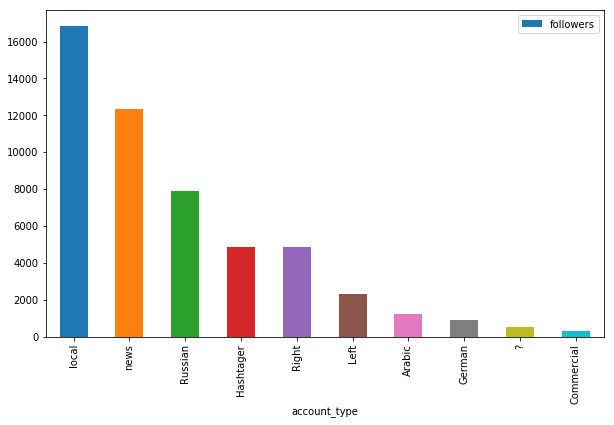

In [10]:
df.groupby(by='account_type').mean().sort_values(by='followers', ascending=False).head(10).plot(kind='bar', y='followers', figsize=(10,6))

In [16]:
pd.set_option('max_colwidth', 250)
df.head()
import re

def hash_search(row):
    text = row['content']
    if pd.isna(text):
        text = ""
    #print(text)
    text_list = re.split('\.| |; |, |\*|\n|\\(|\\)|!|\\?',text)
    #print(text_list)
    indices_hash = [i for i, x in enumerate(text_list) if x.startswith("#")]
    indices_at = [j for j, x in enumerate(text_list) if x.startswith("@")]
    hash_list = list()
    at_list = list()
    for k in indices_hash:
        hash_list.append(text_list[k])
    for l in indices_at:
        at_list.append(text_list[l])
    return([hash_list, at_list])

df[['hashtags', 'ats']] = df.apply(hash_search, result_type='expand', axis=1)


In [19]:
df.hashtags.head(100)

0                         []
1                         []
2              [#BoycottNFL]
3                         []
4     [#StandForOurAnthem🇺🇸]
5                         []
6                         []
7                         []
8                         []
9                         []
10                        []
11                        []
12                        []
13                        []
14                        []
15                        []
16                        []
17                        []
18                        []
19                        []
20                        []
21                        []
22                        []
23                        []
24           [#HipHopAwards]
25                        []
26                        []
27                        []
28                        []
29                        []
               ...          
70                        []
71       [#LasVegasStrong🇺🇸]
72       [#LasVegasShooting]
73            

In [23]:
row_accumulator = []
def splitListToRows(row, target_column):
    #print(row[target_column])
    for s in row[target_column]:
        new_row = row.to_dict()
        new_row[target_column] = s
        row_accumulator.append(new_row)

df.apply(lambda row:splitListToRows(row,'hashtags'), axis=1)
new_df = pd.DataFrame(row_accumulator)

In [27]:
new_df['hashtags'].value_counts()

#news                        128545
#sports                       48632
#politics                     39737
#world                        27558
#local                        25889
#TopNews                      15149
#MAGA                         13700
#BlackLivesMatter             11628
#health                       11475
#tcot                         11264
#business                     10840
#новости                      10307
#PJNET                        10300
#tech                          8225
#entertainment                 7586
#top                           7417
#Cleveland                     6694
#TopVideo                      6547
#crime                         6502
#ISIS                          5937
#environment                   5784
#Trump                         5479
#Merkelmussbleiben             5382
#mar                           4865
#Miami                         4556
#breaking                      4519
#Merkel                        4513
#topl                       

In [28]:
new_df.head()

,account_category,account_type,alt_external_id,article_url,ats,author,content,external_author_id,followers,following,...,publish_date,publish_month,publish_year,region,retweet,tco1_step1,tco2_step1,tco3_step1,tweet_id,updates
0,RightTroll,Right,905874659358453760,http://twitter.com/905874659358453760/statuses/914623490375979008,[],10_GOP,"Daughter of fallen Navy Sailor delivers powerful monologue on anthem protests, burns her NFL packers gear. #BoycottNFL https://t.co/qDlFBGMeag",906000000000000000,9637,1054,...,2017-10-01 22:50:00,10,2017,Unknown,True,https://twitter.com/10_gop/status/913231923715198976/video/1,NaN,NaN,914623490375979008,255
1,RightTroll,Right,905874659358453760,http://twitter.com/905874659358453760/statuses/914312219952861184,[],10_GOP,"19,000 RESPECTING our National Anthem! #StandForOurAnthem🇺🇸 https://t.co/czutyGaMQV",906000000000000000,9645,1050,...,2017-10-01 02:13:00,10,2017,Unknown,True,https://twitter.com/realDonaldTrump/status/914310901855129601/video/1,NaN,NaN,914312219952861184,246
2,RightTroll,Right,905874659358453760,http://twitter.com/905874659358453760/statuses/917936350527152128,[],10_GOP,This Eminem freestyle proves that celebs still haven't learned that nobody cares what they have to say. Sad! #HipHopAwards,906000000000000000,10337,1069,...,2017-10-11 02:14:00,10,2017,Unknown,False,NaN,NaN,NaN,917936350527152128,306
3,RightTroll,Right,905874659358453760,http://twitter.com/905874659358453760/statuses/918939099972669441,[],10_GOP,President Trump: #Iran was Economically BANKRUPT until Obama gifted them 1.7 BILLION in CASH &amp; infused 150 BILLION into their economy ...... https://t.co/GocTNG4KyL,906000000000000000,10441,1070,...,2017-10-13 20:38:00,10,2017,Unknown,True,https://twitter.com/StockMonsterUSA/status/918933849664495616/video/1,NaN,NaN,918939099972669441,334
4,RightTroll,Right,905874659358453760,http://twitter.com/905874659358453760/statuses/918967415534489600,[],10_GOP,NFL having to write out how players conduct themselves during the anthem is HILARIOUS. I learned how to honor the flag in GRADE SCHOOL #MAGA https://t.co/pe7ijVpslF,906000000000000000,10443,1071,...,2017-10-13 22:31:00,10,2017,Unknown,True,https://twitter.com/SheriffClarke/status/918092028373807105/photo/1,NaN,NaN,918967415534489600,337


In [29]:
author_data.head()

,account_type,account_category,following,followers,tweet_count
author,,,,,
10_GOP,Right,RightTroll,985.018817,7044.306452,372
1488REASONS,Russian,NonEnglish,5219.423077,6401.807692,52
1D_NICOLE_,Koch,Fearmonger,58.500000,51.477273,44
1ERIK_LEE,Right,RightTroll,239.000000,74.000000,2
1LORENAFAVA1,Italian,NonEnglish,400.356277,84.081285,3051


In [31]:
new_df.to_csv('parsed_tweets.csv')

In [32]:
author_data.to_csv('author_data.csv')